# Executive Summary

I'm using the environment in the OpenAI gym - MuJoCo to practice how to train an agent by reinforcement learning. In this notebook, ***the goal of the environment is to make the humanoid standup*** and ***then keep it standing by applying torques on the various hinges***

***Found Project Baseline by Using Random Action*** (Section 4)
- By taken random actions ***The body of robot keep on the ground all the time and only both legs are moving around but fail to standup***. 
- At the end of each episode score receive between 32648 to 33854 (average 33418). 

***Using stable_baselines3 PPO model to traing the Agent*** (Section 5)
- The ***Mean Reward stop improving after 3M timesteps around 130000***
- Compare to the average reward 33418 by taking random action before learning, the agent perform 4 times better 
- ***Best performance during the learning at 2.6 million timesteps***, the ***average reward received 148623***. 

### ***Table of Content:***
1. What is Humanoid Standup
2. Import Dependencies
3. Understanding The Environment
4. Found Project Baseline by Using Random Action
5. Using Stable_baselines3 PPO model
6. Load The Best Saved Agent

# 1. What is HumanoidStandup-v2

<img src='http://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/HumanoidStandup-v2/poster.jpg' width='250px'/>

***Goal***
- The ***3D bipedal robot is designed to simulate a human***. It ***has a torso (abdomen) with a pair of legs and arms***. The legs each consist of two links, and so the arms (representing the knees and elbows respectively). The environment starts with the humanoid layiing on the ground, and then ***the goal of the environment is to make the humanoid standup*** and ***then keep it standing by applying torques on the various hinges***.

***Action Space***
- Actions are ***17-element vector in the [-1, 1] range, where `action` represents the numerical torques applied at the hinge joints***.

    | Num | Action                    | Control Min | Control Max | Name (in corresponding XML file) | Joint | Unit |
    |-----|----------------------|---------------|----------------|---------------------------------------|-------|------|
    | 0   | Torque applied on the hinge in the y-coordinate of the abdomen                     | -0.4 | 0.4 | hip_1 (front_left_leg)      | hinge | torque (N m) |
    | 1   | Torque applied on the hinge in the z-coordinate of the abdomen                     | -0.4 | 0.4 | angle_1 (front_left_leg)    | hinge | torque (N m) |
    | 2   | Torque applied on the hinge in the x-coordinate of the abdomen                     | -0.4 | 0.4 | hip_2 (front_right_leg)     | hinge | torque (N m) |
    | 3   | Torque applied on the rotor between torso/abdomen and the right hip (x-coordinate) | -0.4 | 0.4 | right_hip_x (right_thigh)   | hinge | torque (N m) |
    | 4   | Torque applied on the rotor between torso/abdomen and the right hip (z-coordinate) | -0.4 | 0.4 | right_hip_z (right_thigh)   | hinge | torque (N m) |
    | 5   | Torque applied on the rotor between torso/abdomen and the right hip (y-coordinate) | -0.4 | 0.4 | right_hip_y (right_thigh)   | hinge | torque (N m) |
    | 6   | Torque applied on the rotor between the right hip/thigh and the right shin         | -0.4 | 0.4 | right_knee                  | hinge | torque (N m) |
    | 7   | Torque applied on the rotor between torso/abdomen and the left hip (x-coordinate)  | -0.4 | 0.4 | left_hip_x (left_thigh)     | hinge | torque (N m) |
    | 8   | Torque applied on the rotor between torso/abdomen and the left hip (z-coordinate)  | -0.4 | 0.4 | left_hip_z (left_thigh)     | hinge | torque (N m) |
    | 9   | Torque applied on the rotor between torso/abdomen and the left hip (y-coordinate)  | -0.4 | 0.4 | left_hip_y (left_thigh)     | hinge | torque (N m) |
    | 10   | Torque applied on the rotor between the left hip/thigh and the left shin          | -0.4 | 0.4 | left_knee                   | hinge | torque (N m) |
    | 11   | Torque applied on the rotor between the torso and right upper arm (coordinate -1) | -0.4 | 0.4 | right_shoulder1             | hinge | torque (N m) |
    | 12   | Torque applied on the rotor between the torso and right upper arm (coordinate -2) | -0.4 | 0.4 | right_shoulder2             | hinge | torque (N m) |
    | 13   | Torque applied on the rotor between the right upper arm and right lower arm       | -0.4 | 0.4 | right_elbow                 | hinge | torque (N m) |
    | 14   | Torque applied on the rotor between the torso and left upper arm (coordinate -1)  | -0.4 | 0.4 | left_shoulder1              | hinge | torque (N m) |
    | 15   | Torque applied on the rotor between the torso and left upper arm (coordinate -2)  | -0.4 | 0.4 | left_shoulder2              | hinge | torque (N m) |
    | 16   | Torque applied on the rotor between the left upper arm and left lower arm         | -0.4 | 0.4 | left_elbow                  | hinge | torque (N m) |


***Observation Space***
- State consists of ***positional values of different body parts of the Humanoid, followed by the velocities of those individual parts (their derivatives) with all the positions ordered before all the velocities***. 
- **Note:** The x- and y-coordinates of the torso are being omitted to produce position-agnostic behavior in policies.
- The observation is a `ndarray` with shape `(376,)` where the elements correspond to the following:
    | Num | Observation                                                        | Min                | Max                | Name (in corresponding XML file) | Joint | Unit |
    |-----|---------------------------------------------------------|----------------|-----------------|----------------------------------------|-------|------|
    | 0   | z-coordinate of the torso (centre)                                                                              | -Inf                 | Inf                | root      | free | position (m) |
    | 1   | x-orientation of the torso (centre)                                                                             | -Inf                 | Inf                | root      | free | angle (rad) |
    | 2   | y-orientation of the torso (centre)                                                                             | -Inf                 | Inf                | root      | free | angle (rad) |
    | 3   | z-orientation of the torso (centre)                                                                             | -Inf                 | Inf                | root      | free | angle (rad) |
    | 4   | w-orientation of the torso (centre)                                                                             | -Inf                 | Inf                | root       | free | angle (rad) |
    | 5   | z-angle of the abdomen (in lower_waist)                                                                         | -Inf                 | Inf               | abdomen_z | hinge | angle (rad) |
    | 6   | y-angle of the abdomen (in lower_waist)                                                                         | -Inf                 | Inf               | abdomen_y | hinge | angle (rad) |
    | 7   | x-angle of the abdomen (in pelvis)                                                                              | -Inf                 | Inf               | abdomen_x | hinge | angle (rad) |
    | 8   | x-coordinate of angle between pelvis and right hip (in right_thigh)                                             | -Inf                 | Inf               | right_hip_x | hinge | angle (rad) |
    | 9   | z-coordinate of angle between pelvis and right hip (in right_thigh)                                             | -Inf                 | Inf               | right_hip_z | hinge | angle (rad) |
    | 10  | y-coordinate of angle between pelvis and right hip (in right_thigh)                                             | -Inf                 | Inf               | right_hip_y | hinge | angle (rad) |
    | 11  | angle between right hip and the right shin (in right_knee)                                                      | -Inf                 | Inf               | right_knee | hinge | angle (rad) |
    | 12  | x-coordinate of angle between pelvis and left hip (in left_thigh)                                               | -Inf                 | Inf               | left_hip_x | hinge | angle (rad) |
    | 13  | z-coordinate of angle between pelvis and left hip (in left_thigh)                                               | -Inf                 | Inf               | left_hip_z | hinge | angle (rad) |
    | 14  | y-coordinate of angle between pelvis and left hip (in left_thigh)                                               | -Inf                 | Inf               | left_hip_y | hinge | angle (rad) |
    | 15  | angle between left hip and the left shin (in left_knee)                                                         | -Inf                 | Inf               | left_knee | hinge | angle (rad) |
    | 16  | coordinate-1 (multi-axis) angle between torso and right arm (in right_upper_arm)                                | -Inf                 | Inf               | right_shoulder1 | hinge | angle (rad) |
    | 17  | coordinate-2 (multi-axis) angle between torso and right arm (in right_upper_arm)                                | -Inf                 | Inf               | right_shoulder2 | hinge | angle (rad) |
    | 18  | angle between right upper arm and right_lower_arm                                                               | -Inf                 | Inf               | right_elbow | hinge | angle (rad) |
    | 19  | coordinate-1 (multi-axis) angle between torso and left arm (in left_upper_arm)                                  | -Inf                 | Inf               | left_shoulder1 | hinge | angle (rad) |
    | 20  | coordinate-2 (multi-axis) angle between torso and left arm (in left_upper_arm)                                  | -Inf                 | Inf               | left_shoulder2 | hinge | angle (rad) |
    | 21  | angle between left upper arm and left_lower_arm                                                                 | -Inf                 | Inf               | left_elbow | hinge | angle (rad) |
    | 22  | x-coordinate velocity of the torso (centre)                                                                     | -Inf                 | Inf                | root      | free | velocity (m/s) |
    | 23  | y-coordinate velocity of the torso (centre)                                                                     | -Inf                 | Inf                | root      | free | velocity (m/s) |
    | 24  | z-coordinate velocity of the torso (centre)                                                                     | -Inf                 | Inf                | root      | free | velocity (m/s) |
    | 25  | x-coordinate angular velocity of the torso (centre)                                                             | -Inf                 | Inf                | root      | free | anglular velocity (rad/s) |
    | 26  | y-coordinate angular velocity of the torso (centre)                                                             | -Inf                 | Inf                | root      | free | anglular velocity (rad/s) |
    | 27  | z-coordinate angular velocity of the torso (centre)                                                             | -Inf                 | Inf                | root      | free | anglular velocity (rad/s) |
    | 28  | z-coordinate of angular velocity of the abdomen (in lower_waist)                                                | -Inf                 | Inf               | abdomen_z | hinge | anglular velocity (rad/s) |
    | 29  | y-coordinate of angular velocity of the abdomen (in lower_waist)                                                | -Inf                 | Inf               | abdomen_y | hinge | anglular velocity (rad/s) |
    | 30  | x-coordinate of angular velocity of the abdomen (in pelvis)                                                     | -Inf                 | Inf               | abdomen_x | hinge | aanglular velocity (rad/s) |
    | 31  | x-coordinate of the angular velocity of the angle between pelvis and right hip (in right_thigh)                 | -Inf                 | Inf               | right_hip_x | hinge | anglular velocity (rad/s) |
    | 32  | z-coordinate of the angular velocity of the angle between pelvis and right hip (in right_thigh)                 | -Inf                 | Inf               | right_hip_z | hinge | anglular velocity (rad/s) |
    | 33  | y-coordinate of the angular velocity of the angle between pelvis and right hip (in right_thigh)                 | -Inf                 | Inf               | right_hip_y | hinge | anglular velocity (rad/s) |
    | 35  | angular velocity of the angle between right hip and the right shin (in right_knee)                              | -Inf                 | Inf               | right_knee | hinge | anglular velocity (rad/s) |
    | 36  | x-coordinate of the angular velocity of the angle between pelvis and left hip (in left_thigh)                   | -Inf                 | Inf               | left_hip_x | hinge | anglular velocity (rad/s) |
    | 37  | z-coordinate of the angular velocity of the angle between pelvis and left hip (in left_thigh)                   | -Inf                 | Inf               | left_hip_z | hinge | anglular velocity (rad/s) |
    | 38  | y-coordinate of the angular velocity of the angle between pelvis and left hip (in left_thigh)                   | -Inf                 | Inf               | left_hip_y | hinge | anglular velocity (rad/s) |
    | 39  | angular velocity of the angle between left hip and the left shin (in left_knee)                                 | -Inf                 | Inf               | left_knee | hinge | anglular velocity (rad/s) |
    | 40  | coordinate-1 (multi-axis) of the angular velocity of the angle between torso and right arm (in right_upper_arm) | -Inf                 | Inf               | right_shoulder1 | hinge | anglular velocity (rad/s) |
    | 41  | coordinate-2 (multi-axis) of the angular velocity of the angle between torso and right arm (in right_upper_arm) | -Inf                 | Inf               | right_shoulder2 | hinge | anglular velocity (rad/s) |
    | 42  | angular velocity of the angle between right upper arm and right_lower_arm                                       | -Inf                 | Inf               | right_elbow | hinge | anglular velocity (rad/s) |
    | 43  | coordinate-1 (multi-axis) of the angular velocity of the angle between torso and left arm (in left_upper_arm)   | -Inf                 | Inf               | left_shoulder1 | hinge | anglular velocity (rad/s) |
    | 44  | coordinate-2 (multi-axis) of the angular velocity of the angle between torso and left arm (in left_upper_arm)   | -Inf                 | Inf               | left_shoulder2 | hinge | anglular velocity (rad/s) |
    | 45  | angular velocitty of the angle between left upper arm and left_lower_arm                                        | -Inf                 | Inf               | left_elbow | hinge | anglular velocity (rad/s) |



***Rewards***
- ***uph_cost***: ***A reward for moving upward*** (in an attempt to stand up). This is not a relative reward which meaures how much upward it has moved from the last timestep, but ***it is an absolute reward which measures how much upward the Humanoid has moved overall***. It is measured as ***(z coordinate after action - 0)/(atomic timestep)***, where ***z coordinate after action*** is index 0 in the state/index 2 in the table, and ***atomic timestep*** is the time for one frame of movement even though the simulation has a framerate of 5 (done in order to inflate rewards a little for fassteer learning).

- ***quad_ctrl_cost***: ***A negative reward for penalising the humanoid if it has too large of a control force***. If there are ***nu*** actuators/controls, then the control has shape  `nu x 1`. It is measured as ***0.1 x sum(control<sup>2</sup>)***.

- ***quad_impact_cost***: A negative reward for penalising the humanoid if the external contact force is too large. It is calculated as *min(0.5 * 0.000001 * sum(external contact force<sup>2</sup>), 10)*.

- The total reward returned is ***reward = uph_cost + 1 - quad_ctrl_cost - quad_impact_cost***

***Starting State***
- All observations start in state (0.0, 0.0,  0.105, 1.0, 0.0  ... 0.0) with a uniform noise in the range of [-0.01, 0.01] added to the positional and velocity values (values in the table) for stochasticity. 

- Note that the initial z coordinate is intentionally selected to be low, thereby indicating a laying down humanoid. The initial orientation is designed to make it face forward as well.

***Episode Termination***
- The episode duration ***reaches a 1000 timesteps***
- Any of the ***state space values is no longer finite***

# 2. Import Dependencies

objc[1009]: Class GLFWApplicationDelegate is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x10dcd0778) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10e0c87c0). One of the two will be used. Which one is undefined.
objc[1009]: Class GLFWWindowDelegate is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x10dcd0700) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10e0c87e8). One of the two will be used. Which one is undefined.
objc[1009]: Class GLFWContentView is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x10dcd07a0) and /Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/glfw/libglfw.3.dylib (0x10e0c8838). One of the two will be used. Which one is undefined.
objc[1009]: Class GLFWWindow is implemented in both /Users/hoikinyu/.mujoco/mujoco200/bin/libglfw.3.dylib (0x10dcd0818) and /Users/hoikinyu/opt/anaconda3/lib/pyt

Creating offscreen glfw


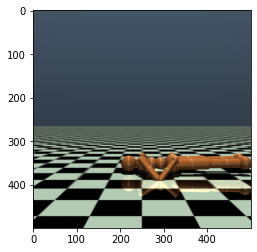

In [1]:
import mujoco_py
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('HumanoidStandup-v2')                          # Using Humanoid verion 2 in this notebook
env.reset()                                            # reset the environment to initial default

plt.imshow(env.render('rgb_array'))                    # display the environment

# 3. Understanding The Environment

In [2]:
state = env.reset()

print("There are %d states in observation:" % len(state), state)

There are 376 states in observation: [ 1.00139959e-01  9.99963927e-01 -7.33953089e-03  2.82869068e-03
  3.20532563e-03  8.57613908e-03 -1.82110019e-03 -9.39971135e-03
 -7.65140866e-03 -3.38697804e-03  7.65067042e-03  1.06326150e-03
  9.18511922e-03 -7.65457868e-03 -8.68500109e-03  2.79948544e-03
 -4.14314749e-03 -7.14766722e-03  8.11744360e-03  2.80295500e-03
  7.34724429e-03  3.41995170e-03  3.89504139e-03  5.87463500e-03
 -3.45894497e-03 -7.38064036e-03 -9.95766152e-03 -6.82040249e-03
  1.81200448e-03  7.11604463e-03 -7.66785764e-04 -2.32701671e-03
 -1.65875881e-03  2.53757652e-03  2.78974859e-03 -6.41565619e-03
 -2.30673802e-03 -3.23042403e-03 -9.22965259e-03  1.44460317e-03
  6.98889603e-04 -6.54337126e-03  3.42826820e-03  4.30386445e-03
 -4.48759653e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.33324455e-02
  1.85005902e+00  1.86180826e+00 -1.99065951e-02  9.5

In [3]:
action = env.action_space.sample()

print("There are %d motor speed values in the range [-1, 1]:" % len(action), action)

There are 17 motor speed values in the range [-1, 1]: [ 0.02293036 -0.21308382 -0.11641499  0.22205621  0.22364798 -0.12379235
  0.05789534 -0.07505023  0.04200531  0.25495288  0.20207183  0.06819701
  0.20498164  0.06646703  0.1555787   0.27330565  0.30818537]


# 4. Found Project Baseline by Using Random Action

In [4]:
%%time
episodes = 5

for episode in range(1, episodes + 1):                     # looping from 1 to 5
    
    state = env.reset()                                    # initial the set of observation
    
    done = False                                           # initial the game is over = False, until reach maximum number of steps in this particular environment
    
    score = 0                                              # running score counter
    
    timesteps_counter = 0                                  # count the number of timestep spend
    
    while not done:
        
        env.render()                                       # view the graphical representation that environment
        
        action = env.action_space.sample()                 # random choose an action 
        
        new_state, reward, done, info = env.step(action)   # pass random actions into environment to get back
                                                            # 1. next set of observation
                                                            # 2. reward
                                                            # 3. done (episode is done = True)
        
        score += reward                                    # accumulate each episodes' reward received into score
        
        state = new_state                                  # update state
        
        timesteps_counter += 1                             # +1 in each timestep spend
        
    print('Episode:{} Score:{} Timesteps Spend:{}'.format(episode, score,timesteps_counter))    # print out score for each episode

Creating window glfw
Episode:1 Score:33666.93639253739 Timesteps Spend:1000
Episode:2 Score:33854.90531214821 Timesteps Spend:1000
Episode:3 Score:32648.75591404551 Timesteps Spend:1000
Episode:4 Score:33598.13446625098 Timesteps Spend:1000
Episode:5 Score:33323.635233996414 Timesteps Spend:1000
CPU times: user 5.97 s, sys: 1.45 s, total: 7.42 s
Wall time: 19.3 s


Remark: 
- The above 5 episode showing that, by taken random actions ***The body of robot keep on the ground all the time and only both legs are moving around but fail to standup***. 
- At the end of each episode score receive between 32648 to 33854 (average 33418). 

# 5. Using Stable_baselines3 PPO model

In [4]:
# Import dependency
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# Import Base Callback for saving models
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold


# Save the trained model into train directory
save_path = os.path.join('Training', 'HumanoidStandup')

# Save the log into log directory
log_path = './logs/HumanoidStandup'

stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 150000,    # stop traing when achieve 150000 reward
                                              verbose = 2
                                             )  

eval_callback = EvalCallback(env, 
                             callback_on_new_best = stop_callback,      # every time new best model, then run stop_callback. When stop_callback achieve 200000 reward, then stop the training
                             eval_freq = 50000,                         # set how often to run eval_callback 
                             best_model_save_path = save_path,
                             verbose = 1
                            )

env = DummyVecEnv([lambda: env])           # Environment creation function

model = PPO('MlpPolicy',
            env,
            tensorboard_log = log_path, 
            verbose = 1, 
            learning_rate = 0.0001,
            n_steps = 10000                  # 10000 here means that 10000 sets of observations actions, log probabilities & values will be stored in the buffer for one iteration 
           )

Using cpu device


/Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10000`, after every 156 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10000 and n_envs=1)
  warnings.warn(


In [7]:
%%time
model.learn(total_timesteps = 5000000,   # 5 Million timesteps
            callback = eval_callback
           )

Logging to ./logs/HumanoidStandup/PPO_11
------------------------------
| time/              |       |
|    fps             | 702   |
|    iterations      | 1     |
|    time_elapsed    | 14    |
|    total_timesteps | 10000 |
------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 770          |
|    iterations           | 2            |
|    time_elapsed         | 25           |
|    total_timesteps      | 20000        |
| train/                  |              |
|    approx_kl            | 0.0069689616 |
|    clip_fraction        | 0.0535       |
|    clip_range           | 0.2          |
|    entropy_loss         | -24.1        |
|    explained_variance   | -0.000353    |
|    learning_rate        | 0.0001       |
|    loss                 | 2.12e+05     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0133      |
|    std                  | 0.999        |
|    value_

/Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50000, episode_reward=73505.98 +/- 91.85
Episode length: 1000.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | 7.35e+04     |
| time/                   |              |
|    total_timesteps      | 50000        |
| train/                  |              |
|    approx_kl            | 0.0072628874 |
|    clip_fraction        | 0.0517       |
|    clip_range           | 0.2          |
|    entropy_loss         | -24          |
|    explained_variance   | -5.96e-06    |
|    learning_rate        | 0.0001       |
|    loss                 | 2.74e+05     |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.0157      |
|    std                  | 0.993        |
|    value_loss           | 4.89e+05     |
------------------------------------------
New best mean reward!
------------------------------
| time/              |       |
|    f

Eval num_timesteps=150000, episode_reward=66163.15 +/- 630.89
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.62e+04    |
| time/                   |             |
|    total_timesteps      | 150000      |
| train/                  |             |
|    approx_kl            | 0.007945128 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.2         |
|    entropy_loss         | -23.7       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 6.42e+05    |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0185     |
|    std                  | 0.975       |
|    value_loss           | 8.36e+05    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 787    |
|    iterat

Eval num_timesteps=250000, episode_reward=56723.92 +/- 154.24
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 5.67e+04    |
| time/                   |             |
|    total_timesteps      | 250000      |
| train/                  |             |
|    approx_kl            | 0.007866779 |
|    clip_fraction        | 0.0569      |
|    clip_range           | 0.2         |
|    entropy_loss         | -23.3       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.45e+05    |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0181     |
|    std                  | 0.955       |
|    value_loss           | 1.17e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 786    |
|    iterat

Eval num_timesteps=350000, episode_reward=77939.12 +/- 904.78
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.79e+04    |
| time/                   |             |
|    total_timesteps      | 350000      |
| train/                  |             |
|    approx_kl            | 0.009573088 |
|    clip_fraction        | 0.0824      |
|    clip_range           | 0.2         |
|    entropy_loss         | -23.1       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 6.3e+05     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0217     |
|    std                  | 0.94        |
|    value_loss           | 1.15e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 781    |
|    iterat

Eval num_timesteps=450000, episode_reward=70699.41 +/- 7446.96
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.07e+04    |
| time/                   |             |
|    total_timesteps      | 450000      |
| train/                  |             |
|    approx_kl            | 0.009947792 |
|    clip_fraction        | 0.0849      |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.8       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.27e+05    |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0214     |
|    std                  | 0.925       |
|    value_loss           | 1.17e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 780    |
|    itera

Eval num_timesteps=550000, episode_reward=79024.12 +/- 1245.99
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.9e+04     |
| time/                   |             |
|    total_timesteps      | 550000      |
| train/                  |             |
|    approx_kl            | 0.010275941 |
|    clip_fraction        | 0.0874      |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.5       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 5.34e+05    |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0226     |
|    std                  | 0.909       |
|    value_loss           | 1.26e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 779    |
|    itera

Eval num_timesteps=650000, episode_reward=70463.72 +/- 5721.54
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.05e+04    |
| time/                   |             |
|    total_timesteps      | 650000      |
| train/                  |             |
|    approx_kl            | 0.011386836 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.3       |
|    explained_variance   | 2.38e-07    |
|    learning_rate        | 0.0001      |
|    loss                 | 5.57e+05    |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0248     |
|    std                  | 0.897       |
|    value_loss           | 1.24e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 776    |
|    itera

Eval num_timesteps=750000, episode_reward=68731.98 +/- 900.08
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.87e+04    |
| time/                   |             |
|    total_timesteps      | 750000      |
| train/                  |             |
|    approx_kl            | 0.010989927 |
|    clip_fraction        | 0.0966      |
|    clip_range           | 0.2         |
|    entropy_loss         | -22         |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 6.38e+05    |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.0232     |
|    std                  | 0.886       |
|    value_loss           | 1.28e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 773    |
|    iterat

Eval num_timesteps=850000, episode_reward=68287.88 +/- 2915.06
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.83e+04    |
| time/                   |             |
|    total_timesteps      | 850000      |
| train/                  |             |
|    approx_kl            | 0.011843904 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.8       |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0001      |
|    loss                 | 6.5e+05     |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.023      |
|    std                  | 0.872       |
|    value_loss           | 1.27e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 770    |
|    itera

Eval num_timesteps=950000, episode_reward=60941.46 +/- 272.92
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.09e+04    |
| time/                   |             |
|    total_timesteps      | 950000      |
| train/                  |             |
|    approx_kl            | 0.012369833 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.5       |
|    explained_variance   | -2.38e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 7.18e+05    |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0262     |
|    std                  | 0.859       |
|    value_loss           | 1.27e+06    |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 767    |
|    iterat

Eval num_timesteps=1050000, episode_reward=60072.67 +/- 314.51
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.01e+04    |
| time/                   |             |
|    total_timesteps      | 1050000     |
| train/                  |             |
|    approx_kl            | 0.013714798 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.3       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 6.87e+05    |
|    n_updates            | 1040        |
|    policy_gradient_loss | -0.0271     |
|    std                  | 0.846       |
|    value_loss           | 1.03e+06    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 765     |
|    it

Eval num_timesteps=1150000, episode_reward=62039.46 +/- 289.15
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.2e+04     |
| time/                   |             |
|    total_timesteps      | 1150000     |
| train/                  |             |
|    approx_kl            | 0.015295741 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21         |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 5.94e+05    |
|    n_updates            | 1140        |
|    policy_gradient_loss | -0.0283     |
|    std                  | 0.835       |
|    value_loss           | 1.07e+06    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 764     |
|    it

Eval num_timesteps=1250000, episode_reward=62166.68 +/- 277.05
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.22e+04    |
| time/                   |             |
|    total_timesteps      | 1250000     |
| train/                  |             |
|    approx_kl            | 0.015408218 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -20.7       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.85e+05    |
|    n_updates            | 1240        |
|    policy_gradient_loss | -0.0282     |
|    std                  | 0.821       |
|    value_loss           | 9.17e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 763     |
|    it

Eval num_timesteps=1350000, episode_reward=63334.25 +/- 333.26
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.33e+04    |
| time/                   |             |
|    total_timesteps      | 1350000     |
| train/                  |             |
|    approx_kl            | 0.016193055 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -20.5       |
|    explained_variance   | -2.38e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 5.05e+05    |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.0297     |
|    std                  | 0.81        |
|    value_loss           | 1.06e+06    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    it

Eval num_timesteps=1450000, episode_reward=63500.23 +/- 100.76
Episode length: 1000.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | 6.35e+04     |
| time/                   |              |
|    total_timesteps      | 1450000      |
| train/                  |              |
|    approx_kl            | 0.0156036345 |
|    clip_fraction        | 0.151        |
|    clip_range           | 0.2          |
|    entropy_loss         | -20.2        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0001       |
|    loss                 | 3.42e+05     |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.0282      |
|    std                  | 0.797        |
|    value_loss           | 9.08e+05     |
------------------------------------------
--------------------------------
| time/              |         |
|    fps             

Eval num_timesteps=1550000, episode_reward=64115.19 +/- 157.14
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 6.41e+04   |
| time/                   |            |
|    total_timesteps      | 1550000    |
| train/                  |            |
|    approx_kl            | 0.01722136 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20        |
|    explained_variance   | -2.38e-07  |
|    learning_rate        | 0.0001     |
|    loss                 | 3.62e+05   |
|    n_updates            | 1540       |
|    policy_gradient_loss | -0.0285    |
|    std                  | 0.789      |
|    value_loss           | 8.82e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    iterations      | 155

Eval num_timesteps=1650000, episode_reward=73079.68 +/- 105.08
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.31e+04    |
| time/                   |             |
|    total_timesteps      | 1650000     |
| train/                  |             |
|    approx_kl            | 0.018070761 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.7       |
|    explained_variance   | -2.38e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 3.81e+05    |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.0303     |
|    std                  | 0.775       |
|    value_loss           | 1.03e+06    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    it

Eval num_timesteps=1750000, episode_reward=63665.40 +/- 806.89
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.37e+04    |
| time/                   |             |
|    total_timesteps      | 1750000     |
| train/                  |             |
|    approx_kl            | 0.018534198 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.5       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 5e+05       |
|    n_updates            | 1740        |
|    policy_gradient_loss | -0.0293     |
|    std                  | 0.763       |
|    value_loss           | 8.88e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    it

Eval num_timesteps=1850000, episode_reward=64488.38 +/- 246.84
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.45e+04    |
| time/                   |             |
|    total_timesteps      | 1850000     |
| train/                  |             |
|    approx_kl            | 0.019693457 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.1       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.3e+05     |
|    n_updates            | 1840        |
|    policy_gradient_loss | -0.0313     |
|    std                  | 0.75        |
|    value_loss           | 9.03e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    it

Eval num_timesteps=1950000, episode_reward=63892.90 +/- 27.68
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.39e+04    |
| time/                   |             |
|    total_timesteps      | 1950000     |
| train/                  |             |
|    approx_kl            | 0.018180082 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19         |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 6.74e+05    |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.0295     |
|    std                  | 0.742       |
|    value_loss           | 9.58e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    ite

Eval num_timesteps=2050000, episode_reward=65153.74 +/- 677.13
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.52e+04    |
| time/                   |             |
|    total_timesteps      | 2050000     |
| train/                  |             |
|    approx_kl            | 0.019898867 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -18.7       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.76e+05    |
|    n_updates            | 2040        |
|    policy_gradient_loss | -0.033      |
|    std                  | 0.731       |
|    value_loss           | 1.01e+06    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    it

Eval num_timesteps=2150000, episode_reward=74017.39 +/- 7730.68
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 7.4e+04    |
| time/                   |            |
|    total_timesteps      | 2150000    |
| train/                  |            |
|    approx_kl            | 0.02031491 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -18.4      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0001     |
|    loss                 | 5.61e+05   |
|    n_updates            | 2140       |
|    policy_gradient_loss | -0.0323    |
|    std                  | 0.718      |
|    value_loss           | 9.52e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    iterations      | 21

Eval num_timesteps=2250000, episode_reward=67415.19 +/- 1447.76
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 6.74e+04   |
| time/                   |            |
|    total_timesteps      | 2250000    |
| train/                  |            |
|    approx_kl            | 0.02262086 |
|    clip_fraction        | 0.222      |
|    clip_range           | 0.2        |
|    entropy_loss         | -18.1      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0001     |
|    loss                 | 3.19e+05   |
|    n_updates            | 2240       |
|    policy_gradient_loss | -0.0336    |
|    std                  | 0.708      |
|    value_loss           | 8.23e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    iterations      | 22

Eval num_timesteps=2350000, episode_reward=142391.79 +/- 5673.27
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 1.42e+05    |
| time/                   |             |
|    total_timesteps      | 2350000     |
| train/                  |             |
|    approx_kl            | 0.024017293 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -17.8       |
|    explained_variance   | 5.96e-08    |
|    learning_rate        | 0.0001      |
|    loss                 | 5.62e+05    |
|    n_updates            | 2340        |
|    policy_gradient_loss | -0.0328     |
|    std                  | 0.696       |
|    value_loss           | 8.41e+05    |
-----------------------------------------
New best mean reward!
--------------------------------
| time/              |         |
|    fps        

Eval num_timesteps=2450000, episode_reward=143179.00 +/- 6680.30
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 1.43e+05    |
| time/                   |             |
|    total_timesteps      | 2450000     |
| train/                  |             |
|    approx_kl            | 0.021676404 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -17.5       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 7.46e+05    |
|    n_updates            | 2440        |
|    policy_gradient_loss | -0.0338     |
|    std                  | 0.686       |
|    value_loss           | 1.04e+06    |
-----------------------------------------
New best mean reward!
--------------------------------
| time/              |         |
|    fps        

Eval num_timesteps=2550000, episode_reward=144164.90 +/- 5511.13
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 1.44e+05    |
| time/                   |             |
|    total_timesteps      | 2550000     |
| train/                  |             |
|    approx_kl            | 0.025428731 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -17.2       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.64e+05    |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.036      |
|    std                  | 0.676       |
|    value_loss           | 8.87e+05    |
-----------------------------------------
New best mean reward!
--------------------------------
| time/              |         |
|    fps        

Eval num_timesteps=2650000, episode_reward=77452.41 +/- 1036.76
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.75e+04    |
| time/                   |             |
|    total_timesteps      | 2650000     |
| train/                  |             |
|    approx_kl            | 0.023413481 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -17         |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 4.44e+05    |
|    n_updates            | 2640        |
|    policy_gradient_loss | -0.0349     |
|    std                  | 0.668       |
|    value_loss           | 9.45e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 763     |
|    i

Eval num_timesteps=2750000, episode_reward=77905.39 +/- 1262.01
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.79e+04    |
| time/                   |             |
|    total_timesteps      | 2750000     |
| train/                  |             |
|    approx_kl            | 0.025242927 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.7       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.74e+05    |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.0348     |
|    std                  | 0.658       |
|    value_loss           | 8.54e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 763     |
|    i

Eval num_timesteps=2850000, episode_reward=75125.21 +/- 1044.53
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.51e+04    |
| time/                   |             |
|    total_timesteps      | 2850000     |
| train/                  |             |
|    approx_kl            | 0.026741985 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.5       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 7.28e+05    |
|    n_updates            | 2840        |
|    policy_gradient_loss | -0.0366     |
|    std                  | 0.651       |
|    value_loss           | 8.99e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 762     |
|    i

Eval num_timesteps=2950000, episode_reward=71552.21 +/- 2011.55
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.16e+04    |
| time/                   |             |
|    total_timesteps      | 2950000     |
| train/                  |             |
|    approx_kl            | 0.028176641 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.3       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.13e+05    |
|    n_updates            | 2940        |
|    policy_gradient_loss | -0.0333     |
|    std                  | 0.646       |
|    value_loss           | 7.35e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    i

Eval num_timesteps=3050000, episode_reward=85678.04 +/- 22391.38
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 8.57e+04    |
| time/                   |             |
|    total_timesteps      | 3050000     |
| train/                  |             |
|    approx_kl            | 0.028810294 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.1       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0001      |
|    loss                 | 3.33e+05    |
|    n_updates            | 3040        |
|    policy_gradient_loss | -0.0357     |
|    std                  | 0.637       |
|    value_loss           | 7.69e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    

Eval num_timesteps=3150000, episode_reward=79124.22 +/- 14363.18
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.91e+04    |
| time/                   |             |
|    total_timesteps      | 3150000     |
| train/                  |             |
|    approx_kl            | 0.028665412 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -15.8       |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0001      |
|    loss                 | 5.55e+05    |
|    n_updates            | 3140        |
|    policy_gradient_loss | -0.0384     |
|    std                  | 0.629       |
|    value_loss           | 9.09e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    

Eval num_timesteps=3250000, episode_reward=72462.32 +/- 5648.67
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.25e+04    |
| time/                   |             |
|    total_timesteps      | 3250000     |
| train/                  |             |
|    approx_kl            | 0.035563473 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.7e+05     |
|    n_updates            | 3240        |
|    policy_gradient_loss | -0.0359     |
|    std                  | 0.622       |
|    value_loss           | 7.3e+05     |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    i

Eval num_timesteps=3350000, episode_reward=77629.39 +/- 11698.89
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.76e+04    |
| time/                   |             |
|    total_timesteps      | 3350000     |
| train/                  |             |
|    approx_kl            | 0.036471505 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.08e+05    |
|    n_updates            | 3340        |
|    policy_gradient_loss | -0.0382     |
|    std                  | 0.615       |
|    value_loss           | 7.2e+05     |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    

Eval num_timesteps=3450000, episode_reward=70829.06 +/- 3474.66
Episode length: 1000.00 +/- 0.00
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 1e+03     |
|    mean_reward          | 7.08e+04  |
| time/                   |           |
|    total_timesteps      | 3450000   |
| train/                  |           |
|    approx_kl            | 0.0348988 |
|    clip_fraction        | 0.294     |
|    clip_range           | 0.2       |
|    entropy_loss         | -15.1     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 4.18e+05  |
|    n_updates            | 3440      |
|    policy_gradient_loss | -0.0374   |
|    std                  | 0.606     |
|    value_loss           | 7.77e+05  |
---------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    iterations      | 345     |
|    time_e

Eval num_timesteps=3550000, episode_reward=66454.17 +/- 1940.57
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 6.65e+04   |
| time/                   |            |
|    total_timesteps      | 3550000    |
| train/                  |            |
|    approx_kl            | 0.03568826 |
|    clip_fraction        | 0.309      |
|    clip_range           | 0.2        |
|    entropy_loss         | -14.9      |
|    explained_variance   | -1.19e-07  |
|    learning_rate        | 0.0001     |
|    loss                 | 4.25e+05   |
|    n_updates            | 3540       |
|    policy_gradient_loss | -0.038     |
|    std                  | 0.601      |
|    value_loss           | 8.45e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 759     |
|    iterations      | 35

Eval num_timesteps=3650000, episode_reward=81094.25 +/- 6394.45
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 8.11e+04    |
| time/                   |             |
|    total_timesteps      | 3650000     |
| train/                  |             |
|    approx_kl            | 0.038993247 |
|    clip_fraction        | 0.313       |
|    clip_range           | 0.2         |
|    entropy_loss         | -14.7       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 5.09e+05    |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.0378     |
|    std                  | 0.593       |
|    value_loss           | 7.57e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 760     |
|    i

Eval num_timesteps=3750000, episode_reward=67791.23 +/- 3127.16
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.78e+04    |
| time/                   |             |
|    total_timesteps      | 3750000     |
| train/                  |             |
|    approx_kl            | 0.039606754 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | -14.4       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.59e+05    |
|    n_updates            | 3740        |
|    policy_gradient_loss | -0.0361     |
|    std                  | 0.584       |
|    value_loss           | 8.33e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 760     |
|    i

Eval num_timesteps=3850000, episode_reward=64962.88 +/- 10171.77
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.5e+04     |
| time/                   |             |
|    total_timesteps      | 3850000     |
| train/                  |             |
|    approx_kl            | 0.043556362 |
|    clip_fraction        | 0.331       |
|    clip_range           | 0.2         |
|    entropy_loss         | -14.1       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.4e+05     |
|    n_updates            | 3840        |
|    policy_gradient_loss | -0.0393     |
|    std                  | 0.575       |
|    value_loss           | 6.69e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 760     |
|    

Eval num_timesteps=3950000, episode_reward=69577.40 +/- 6226.27
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 6.96e+04    |
| time/                   |             |
|    total_timesteps      | 3950000     |
| train/                  |             |
|    approx_kl            | 0.046713494 |
|    clip_fraction        | 0.335       |
|    clip_range           | 0.2         |
|    entropy_loss         | -13.9       |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0001      |
|    loss                 | 4.92e+05    |
|    n_updates            | 3940        |
|    policy_gradient_loss | -0.0373     |
|    std                  | 0.571       |
|    value_loss           | 6.98e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 760     |
|    i

Eval num_timesteps=4050000, episode_reward=84249.74 +/- 8030.33
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 8.42e+04   |
| time/                   |            |
|    total_timesteps      | 4050000    |
| train/                  |            |
|    approx_kl            | 0.04674378 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -13.7      |
|    explained_variance   | 1.19e-07   |
|    learning_rate        | 0.0001     |
|    loss                 | 5.16e+05   |
|    n_updates            | 4040       |
|    policy_gradient_loss | -0.0374    |
|    std                  | 0.565      |
|    value_loss           | 7.62e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 760     |
|    iterations      | 40

Eval num_timesteps=4150000, episode_reward=82780.95 +/- 16387.84
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 8.28e+04    |
| time/                   |             |
|    total_timesteps      | 4150000     |
| train/                  |             |
|    approx_kl            | 0.048938084 |
|    clip_fraction        | 0.349       |
|    clip_range           | 0.2         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.68e+05    |
|    n_updates            | 4140        |
|    policy_gradient_loss | -0.0358     |
|    std                  | 0.558       |
|    value_loss           | 7.04e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    

Eval num_timesteps=4250000, episode_reward=79553.36 +/- 8768.62
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.96e+04    |
| time/                   |             |
|    total_timesteps      | 4250000     |
| train/                  |             |
|    approx_kl            | 0.051925685 |
|    clip_fraction        | 0.362       |
|    clip_range           | 0.2         |
|    entropy_loss         | -13.2       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 3.4e+05     |
|    n_updates            | 4240        |
|    policy_gradient_loss | -0.037      |
|    std                  | 0.55        |
|    value_loss           | 7.32e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    i

Eval num_timesteps=4350000, episode_reward=71060.04 +/- 5511.42
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 7.11e+04    |
| time/                   |             |
|    total_timesteps      | 4350000     |
| train/                  |             |
|    approx_kl            | 0.058391996 |
|    clip_fraction        | 0.374       |
|    clip_range           | 0.2         |
|    entropy_loss         | -13         |
|    explained_variance   | 0           |
|    learning_rate        | 0.0001      |
|    loss                 | 4.47e+05    |
|    n_updates            | 4340        |
|    policy_gradient_loss | -0.039      |
|    std                  | 0.544       |
|    value_loss           | 6.58e+05    |
-----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    i

Eval num_timesteps=4450000, episode_reward=73305.46 +/- 7430.01
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 7.33e+04   |
| time/                   |            |
|    total_timesteps      | 4450000    |
| train/                  |            |
|    approx_kl            | 0.06157756 |
|    clip_fraction        | 0.391      |
|    clip_range           | 0.2        |
|    entropy_loss         | -12.7      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0001     |
|    loss                 | 4.53e+05   |
|    n_updates            | 4440       |
|    policy_gradient_loss | -0.0359    |
|    std                  | 0.538      |
|    value_loss           | 5.74e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 44

Eval num_timesteps=4550000, episode_reward=66813.34 +/- 14898.57
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 6.68e+04   |
| time/                   |            |
|    total_timesteps      | 4550000    |
| train/                  |            |
|    approx_kl            | 0.06368961 |
|    clip_fraction        | 0.378      |
|    clip_range           | 0.2        |
|    entropy_loss         | -12.5      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0001     |
|    loss                 | 4.26e+05   |
|    n_updates            | 4540       |
|    policy_gradient_loss | -0.0354    |
|    std                  | 0.532      |
|    value_loss           | 7.23e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 4

Eval num_timesteps=4650000, episode_reward=74816.04 +/- 3543.15
Episode length: 1000.00 +/- 0.00
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 1e+03     |
|    mean_reward          | 7.48e+04  |
| time/                   |           |
|    total_timesteps      | 4650000   |
| train/                  |           |
|    approx_kl            | 0.0674588 |
|    clip_fraction        | 0.404     |
|    clip_range           | 0.2       |
|    entropy_loss         | -12.3     |
|    explained_variance   | -1.19e-07 |
|    learning_rate        | 0.0001    |
|    loss                 | 2.92e+05  |
|    n_updates            | 4640      |
|    policy_gradient_loss | -0.0384   |
|    std                  | 0.526     |
|    value_loss           | 5.48e+05  |
---------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 465     |
|    time_e

Eval num_timesteps=4750000, episode_reward=68458.62 +/- 17123.25
Episode length: 1000.00 +/- 0.00
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 1e+03     |
|    mean_reward          | 6.85e+04  |
| time/                   |           |
|    total_timesteps      | 4750000   |
| train/                  |           |
|    approx_kl            | 0.0710596 |
|    clip_fraction        | 0.414     |
|    clip_range           | 0.2       |
|    entropy_loss         | -12.2     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 2.59e+05  |
|    n_updates            | 4740      |
|    policy_gradient_loss | -0.0353   |
|    std                  | 0.522     |
|    value_loss           | 5.51e+05  |
---------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 475     |
|    time_

Eval num_timesteps=4850000, episode_reward=77196.35 +/- 3654.10
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 7.72e+04   |
| time/                   |            |
|    total_timesteps      | 4850000    |
| train/                  |            |
|    approx_kl            | 0.07286142 |
|    clip_fraction        | 0.416      |
|    clip_range           | 0.2        |
|    entropy_loss         | -12        |
|    explained_variance   | 0          |
|    learning_rate        | 0.0001     |
|    loss                 | 3.78e+05   |
|    n_updates            | 4840       |
|    policy_gradient_loss | -0.0396    |
|    std                  | 0.517      |
|    value_loss           | 5.67e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 48

Eval num_timesteps=4950000, episode_reward=71903.36 +/- 5776.66
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | 7.19e+04   |
| time/                   |            |
|    total_timesteps      | 4950000    |
| train/                  |            |
|    approx_kl            | 0.06907981 |
|    clip_fraction        | 0.406      |
|    clip_range           | 0.2        |
|    entropy_loss         | -11.8      |
|    explained_variance   | -1.19e-07  |
|    learning_rate        | 0.0001     |
|    loss                 | 2.94e+05   |
|    n_updates            | 4940       |
|    policy_gradient_loss | -0.0368    |
|    std                  | 0.512      |
|    value_loss           | 5.86e+05   |
----------------------------------------
--------------------------------
| time/              |         |
|    fps             | 761     |
|    iterations      | 49

Log Explanation: 

time/
- ***fps - frame per second:*** how fast is the learning processing
- ***iterations:*** currently in which iteration
- ***time_elapsed:*** how long is the time gone for
- ***total_timesteps:*** how many frames the agent actually processed


train/
- ***approx_kl:*** looking at the previous probabilities from the previous agent versus the new agent - looks back what it was predicting previously. If this spike massively, then it means that we have unstable learning and got huge divergence.

If we begin to notice massive spikes in approx_kl, then we can try to increasing the clip_range and gae_lambda hyperparameter.

- ***clip_fraction:*** percentage of clipping - whether or not it was able to not have to clip and go on ahead and train versus the amount of times it did have to clip
- ***clip_range:*** how much it's actually going to clip by, if it needs to clip
- ***policy_gradient_loss:*** how well the agent is able to take actions to capitalize on its advantage, ideally we want to see this decrease, which means that the loss is decreasing, which means the agent is able to better capitalize on advantage
- ***value loss:*** how well the agent is actually able to predict the current return based on the current state in action (decreasing is good sign)

In [8]:
# Evaluation
evaluate_policy(model, env, n_eval_episodes=10, render=True)    # render=True: visualise in real time

Creating window glfw


(73580.21540985108, 6935.891207389789)

In [9]:
env.close()

In [10]:
!tensorboard --logdir={os.path.join('logs', 'HumanoidStandup', 'PPO_11')}


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


<img src='image/HumanoidStandup-v2_PPO_5M_timesteps.png'/>

Remark:
- We would like the ***Mean Reward*** keep going as higher as possible, but it ***stop improving after 3M timesteps around 130000***
- Compare to the average reward 33418 by taking random action before learning, the agent perform 4 times better 
- ***Best performance during the learning at 2.6 million timesteps***, the ***average reward received 148623***. Therefore let's recall the weight at 2.6 million and save it as final result.

# 6. Load The Best Saved Agent

In [25]:
best_model_Path = os.path.join('Training', 'HumanoidStandup', 'best_model')

best_model = PPO.load(best_model_Path, env=env)

In [32]:
env.close

<bound method DummyVecEnv.close of <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fd4bb065fa0>>

In [33]:
# Evaluation
evaluate_policy(best_model, env, n_eval_episodes=10, render=True)    # render=True: visualise in real time

(131579.07636909484, 23065.02688276877)

***End of Page***